## Deep RNNS
- more layers too as well more hidden units in each later 
- 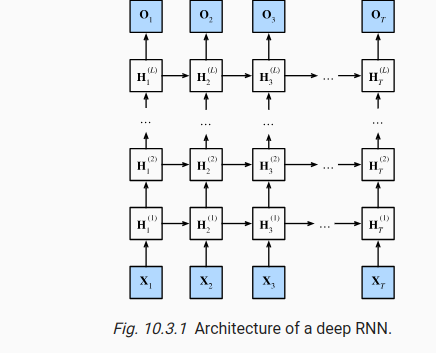
- hidden layers L and hidden units are hyperparameters we can tune. common RNN layer widths are range (64, 205) and L in range (1, 8)

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
class StackedRNNScratch(d2l.Module):
    def __init__(self, num_inputs, num_hiddens, num_layers, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.rnns = nn.Sequential(
            *[d2l.RNNScratch(num_inputs if i==0 else num_hiddens, num_hiddens, sigma) for i in range(self.num_layers)]
        )

In [4]:
@d2l.add_to_class(StackedRNNScratch)
def forward(self, inputs, Hs=None):
    outputs = inputs
    if Hs is None: Hs = [None] * self.num_layers
    for i in range(self.num_layers):
        outputs, Hs[i] = self.rnns[i](outputs, Hs[i])
        outputs = torch.stack(outputs, 0)
    return outputs, Hs

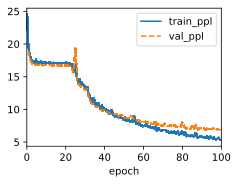

In [5]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn_block = StackedRNNScratch(num_inputs=len(data.vocab),
                              num_hiddens=32, num_layers=2)
model = d2l.RNNLMScratch(rnn_block, vocab_size=len(data.vocab), lr=2)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1)
trainer.fit(model, data)

In [7]:
model.predict("it has", 20, data.vocab)

'it has in and the the the '

In [6]:
class GRU(d2l.RNN):
    def __init__(self, num_inputs, num_hiddens, num_layers, dropout=0):
        d2l.Module.__init__(self)
        self.save_hyperparameters()
        self.rnn = nn.GRU(num_inputs, num_hiddens, num_layers, dropout=dropout)

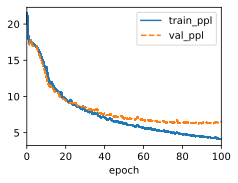

In [8]:
gru = GRU(num_inputs=len(data.vocab), num_hiddens=32, num_layers=2)
model = d2l.RNNLM(gru, vocab_size=len(data.vocab), lr=2)

trainer.fit(model, data)

In [9]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

'it has of shall the bacep '